# CS 109A/AC 209A/STAT 121A Data Science: Final Project
**Harvard University**<br>
**Fall 2016**<br>
**Instructors:** W. Pan, P. Protopapas, K. Rader<br>
**Members: ** Shawn Pan, Xinyuan (Amy) Wang, Ming-long Wu

## Remark ##
- Code to load reviews

In [55]:
import pandas as pd
import numpy as np
import time

import enchant
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# read data
reviews = pd.read_csv('../../Data/reviews.csv')

# check data
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1180670,14705995,2014-06-24,10875598,Gregory,"Ok, if you like the location and don't mind an..."
1,4457617,24432844,2014-12-28,24502047,Amber,"Kleine süße WG, super gelegen, sehr freundlich..."
2,722394,9248781,2013-12-16,6821360,Giri,Extremely disappointed.
3,4074444,23983183,2014-12-15,8822691,Wendy,Exactly as described.
4,68046,11797670,2014-04-15,12231047,Virginie,"Appartement très sympa, accueillant. A quelque..."


In [4]:
print(reviews.shape[0])

277659


In [5]:
reviews['null_review']=np.zeros([reviews.shape[0],])
reviews['if_English']=np.zeros([reviews.shape[0],])

In [7]:
# Clean up 'NaN' rows
reviews['null_review'] = reviews.apply(lambda row: int(pd.isnull(row['comments'])), axis=1)
reviews = reviews[reviews['null_review'] == 0]
# Check reduced data size
print reviews.shape

(277495, 8)


In [8]:
# check if review is English
english_dict = enchant.Dict("en_US")

def check_if_english1(row):
    count_en = 0
    words = row['comments'].split()
    for word in words:
        count_en += int(english_dict.check(word))
    return count_en > 0.7 * len(words)

In [9]:
# Check if reviews are English
reviews['if_English'] = reviews.apply(check_if_english1, axis=1)

In [11]:
reviews_cleaned = pd.DataFrame(reviews[reviews['if_English']==1])
reviews_cleaned=reviews_cleaned.drop('null_review', axis = 1)
print reviews_cleaned.shape

(251941, 7)


In [12]:
float(reviews_cleaned.shape[0])/277659

0.9073755938039105

In [24]:
#output reviews
reviews_cleaned.to_csv('../../Data/reviews_cleaned.csv', sep=',', index = False)
reviews_cleaned[::10000]

,listing_id,id,date,reviewer_id,reviewer_name,comments,if_English
0,1180670,14705995,2014-06-24,10875598,Gregory,"Ok, if you like the location and don't mind an...",True
11107,266756,8042286,2013-10-14,8155079,Crister,"Roberto Mike Mercado is a realyable landlord, ...",True
22122,402201,1578928,2012-06-27,2251260,Dave,The reservation was canceled 183 days before a...,True
33133,1980203,13452728,2014-05-27,500136,Joseph,"Host was a no show. Huge stress, inconvenienc...",True
44158,1264732,8209665,2013-10-21,6651045,Ali,Jeffrey is a great host with his amazing promp...,True
55158,2057534,20496428,2014-09-30,18482309,Julia,Pros: Anwar is a great host! So nice and helpf...,True
66159,816272,4199429,2013-04-17,5788289,Dan,"I booked Cristen's apartment for my parents, a...",True
77247,4098302,22896281,2014-11-17,22344105,Ally,"Overall, the apartment was a great location an...",True
88218,237127,7634863,2013-09-27,8941981,Margaret,I can't recommend this host highly enough. Ex...,True
99148,701474,3151070,2012-12-24,3639945,Tammer,We had a wonderful time staying in Jessi's apa...,True


In [42]:
#may need to download required data
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [20]:
sid = SentimentIntensityAnalyzer()
review_comments = reviews_cleaned["comments"]

#try looking at full comments and individual sentences within comments
for i in range(10):
    comment = review_comments.iloc[i]
    for sent in tokenize.sent_tokenize(comment):
        print sent
        print sid.polarity_scores(sent)
    print "Overall"
    print sid.polarity_scores(comment)
    print

Ok, if you like the location and don't mind an occasional roach.
{'neg': 0.0, 'neu': 0.68, 'pos': 0.32, 'compound': 0.5719}
Overall
{'neg': 0.0, 'neu': 0.68, 'pos': 0.32, 'compound': 0.5719}

Extremely disappointed.
{'neg': 0.772, 'neu': 0.228, 'pos': 0.0, 'compound': -0.5256}
Overall
{'neg': 0.772, 'neu': 0.228, 'pos': 0.0, 'compound': -0.5256}

Exactly as described.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Overall
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

The reservation was canceled the day before arrival.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
This is an automated posting.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Overall
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Very Nice and comfortable.
{'neg': 0.0, 'neu': 0.231, 'pos': 0.769, 'compound': 0.7688}
Great location - Marianne and Son ensured we had a comfortable stay.
{'neg': 0.0, 'neu': 0.519, 'pos': 0.481, 'compound': 0.8126}
Overall
{'neg': 0.0, 'neu': 0.411, 'pos'

It appears that applying the VADER analyzer to the entire comments is a reasonable average of the sentences.

In [52]:
#find review sentiments with VADER algorithm
#neg, neu, pos, compound
reviews["sentiment"] = reviews["comments"].apply(lambda c: sid.polarity_scores(c).values())
reviews["negative_sentiment"] = reviews["sentiment"].apply(lambda s: s[0])
reviews["neutral_sentiment"] = reviews["sentiment"].apply(lambda s: s[1])
reviews["positive_sentiment"] = reviews["sentiment"].apply(lambda s: s[2])
reviews["compound_sentiment"] = reviews["sentiment"].apply(lambda s: s[3])

review_sentiments = reviews[["listing_id", "positive_sentiment", "negative_sentiment", 
                             "neutral_sentiment", "compound_sentiment"]]

review_sentiments.to_csv('../../Data/reviews_sentiment.csv', sep=',', index = False)

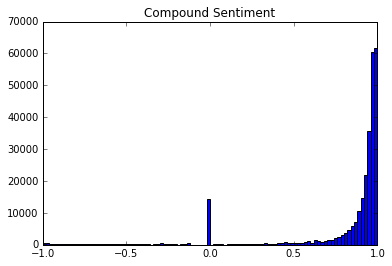

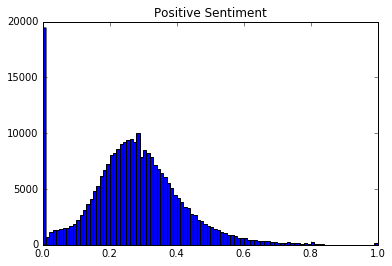

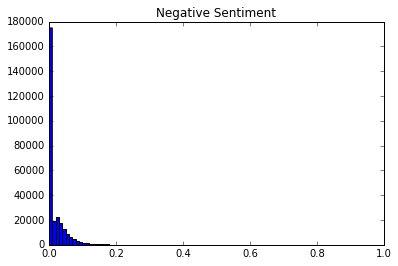

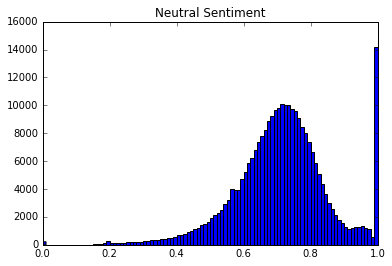

In [59]:
plt.figure()
plt.title("Compound Sentiment")
plt.hist(review_sentiments["compound_sentiment"], bins=100);

plt.figure()
plt.title("Positive Sentiment")
plt.hist(review_sentiments["positive_sentiment"], bins=100);

plt.figure()
plt.title("Negative Sentiment")
plt.hist(review_sentiments["negative_sentiment"], bins=100);

plt.figure()
plt.title("Neutral Sentiment")
plt.hist(review_sentiments["neutral_sentiment"], bins=100);